1. Down-load, then preprocess the MNIST data base (both train and test)
so that 1/3 of the images are rotated by 90 degrees left or and 1/3 are
rotated by 90 degrees right. Separate training data into training and
validation data.

2.  Train a network that has as objective to recognize if the images are
rotated left, right, or not rotated.

3. Provide a plot that shows training and validation accuracy as a function
of epoch and report your final accuracy on the test data.


Imports, Database Download

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # mnist download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

(Download, and) Preprocess the mnist dataset

In [114]:
# Load the MNIST dataset, Train has 60000 images, Test has 10000 images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def preprocess_data(X, y):
    # Split the data into 3 parts, 1/3 for each rotation
    num_images = X.shape[0]
    num_rotated = num_images // 3

    # X Axis rotation
    X_rotated_left = np.rot90(X[:num_rotated], 1, (1, 2))
    X_rotated_right = np.rot90(X[num_rotated:2*num_rotated], 3, (1, 2))
    X_original = X[2*num_rotated:]

    # Y Axis rotation
    y_rotated_left = np.full(num_rotated, 1)  # Label 1 for left rotation
    y_rotated_right = np.full(num_rotated, 2)  # Label 2 for right rotation
    y_original = np.full(X_original.shape[0], 0)  # Label 0 for no rotation

    # Concatenate the rotated images to the original images
    X = np.concatenate((X_original, X_rotated_left, X_rotated_right))
    y = np.concatenate((y_original, y_rotated_left, y_rotated_right))

    return X, y


X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Training data split into training and validation

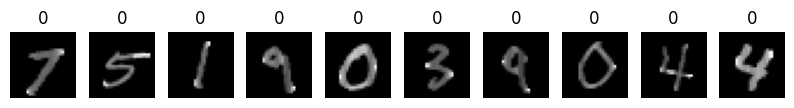

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


In [115]:
# Normalize data array
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

# Function to plot images from specific indices
def plot_images(images, labels, indices):
    plt.figure(figsize=(10, 1))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()

# Plot images from specific indices
indices_to_plot = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
plot_images(X_train, y_train, indices_to_plot)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7338 - loss: 0.7358 - val_accuracy: 0.8839 - val_loss: 0.3619
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.8917 - loss: 0.3390 - val_accuracy: 0.9207 - val_loss: 0.2573
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9247 - loss: 0.2462 - val_accuracy: 0.9383 - val_loss: 0.2037
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9381 - loss: 0.2046 - val_accuracy: 0.9461 - val_loss: 0.1714
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.9501 - loss: 0.1687 - val_accuracy: 0.9549 - val_loss: 0.1488
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9553 - loss: 0.1487 - val_accuracy: 0.9589 - val_loss: 0.1330
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9606 - loss: 0.1320 - val_accuracy: 0.9636 - val_loss: 0.1211
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.9653 - l

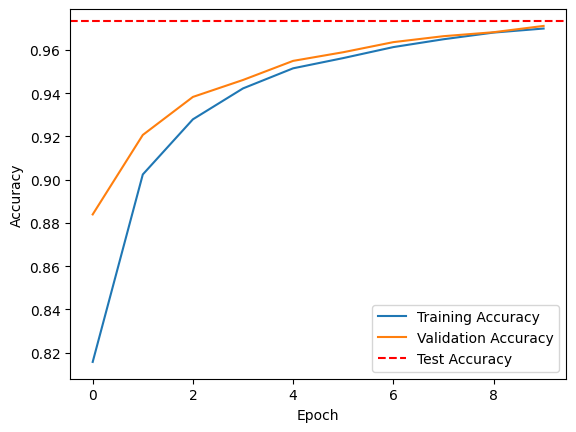

In [119]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and show SGD iterations
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()